In [313]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [314]:
np.random.seed(5151)
merged_df = pd.read_csv('./processed_data/merged_df.csv')
merged_df = merged_df.drop(columns=['Unnamed: 0'])
print(merged_df.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  ...  \
0               4.423615     206.57       371.20               0.56  ...   
1               4.888893     407.86       454.67               0.90  ...   
2               5.694449     236.00       406.90               0.58  ...   
3               4.777782     297.29       415.87               0.71  ...   
4               4.091273     237.57       476.60               0.50  ...   

   TrainingReadiness  Pain  Illness  Nutrition  StandardizedMonitoringScore  \
0                0.0   1.0      3.0  

In [315]:
rpe_df = pd.read_csv('./processed_data/processed_rpe.csv')
rpe_df = rpe_df.drop(columns=['Unnamed: 0'])
print(rpe_df.head())

         Date  PlayerID  Training SessionType  Duration  RPE  SessionLoad  \
0  2017-08-01        15         1    Strength      60.0  4.0        240.0   
1  2017-08-01         1         1       Speed      60.0  3.0        180.0   
2  2017-08-01         1         1    Strength      90.0  4.0        360.0   
3  2017-08-01         3         1       Speed      45.0  5.0        225.0   
4  2017-08-01         3         1    Strength      90.0  5.0        450.0   

   DailyLoad  AcuteChronicRatio  ObjectiveRating  FocusRating  \
0      300.0               4.29              6.0          7.0   
1      540.0               4.29              0.0          0.0   
2      540.0               4.29              0.0          0.0   
3      675.0               4.29              7.0          7.0   
4      675.0               4.29              7.0          7.0   

   BestOutOfMyself  AcuteLoad  ChronicLoad  
0              3.0      42.86         10.0  
1              3.0      77.14         18.0  
2          

In [316]:
wellness_df = pd.read_csv('./processed_data/processed_wellness.csv')
wellness_df = wellness_df.drop(columns=['Unnamed: 0'])
print(wellness_df.head())

         Date  PlayerID  MonitoringScore  Fatigue  Soreness  Desire  \
0  2018-07-21         1               13        3         3       2   
1  2018-07-21         2               19        4         3       4   
2  2018-07-21         3               19        3         3       5   
3  2018-07-21         4               15        2         3       5   
4  2018-07-21         5               20        5         3       4   

   Irritability  SleepScore  SleepHours  SleepQuality  TrainingReadiness  \
0             3        16.0        8.00             2                  0   
1             4        32.0        8.00             4                  0   
2             4        32.0        8.00             4                100   
3             4         6.5        6.50             1                 95   
4             4        29.0        7.25             4                100   

   Pain  Illness  Nutrition  StandardizedMonitoringScore  StandardizedPain  \
0     1        3          3           

In [317]:
merged_df.columns

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'Fatigue', 'Soreness', 'Desire',
       'Irritability', 'SleepScore', 'SleepHours', 'SleepQuality',
       'TrainingReadiness', 'Pain', 'Illness', 'Nutrition',
       'StandardizedMonitoringScore', 'StandardizedPain',
       'StandardizedIllness', 'StandardizedNutrition',
       'StandardizedTrainingReadiness', 'wellness'],
      dtype='object')

# Performance vs Training load graphs per player

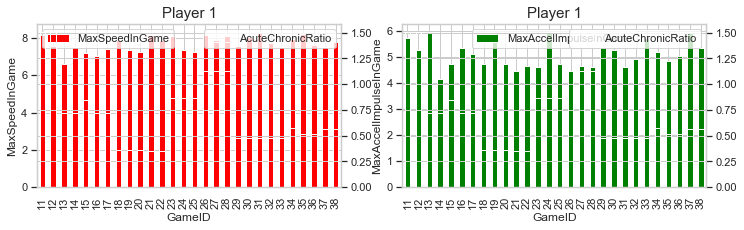

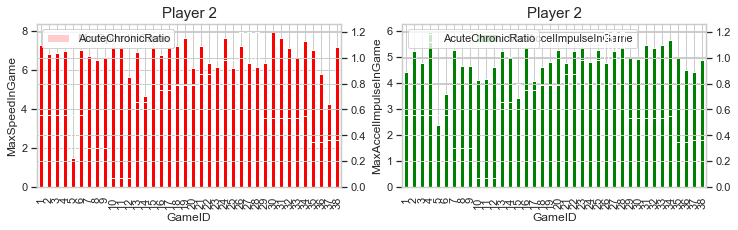

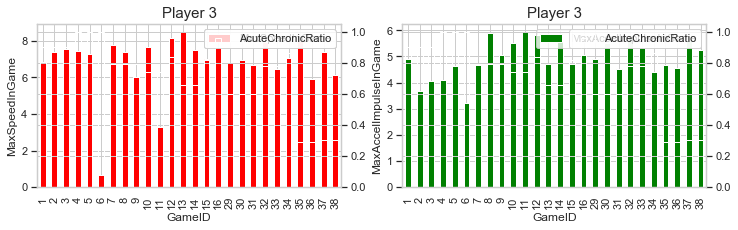

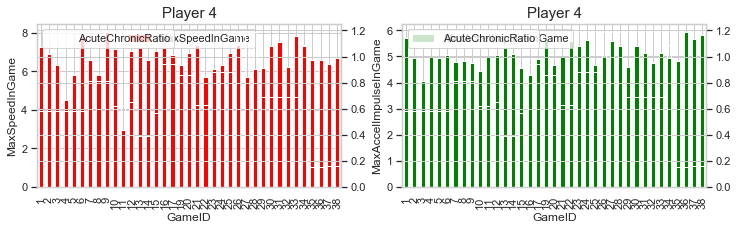

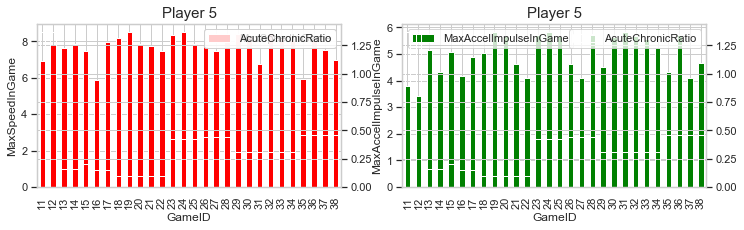

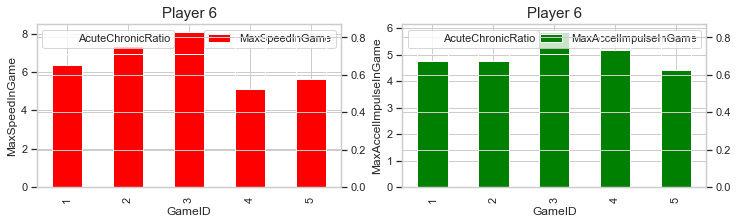

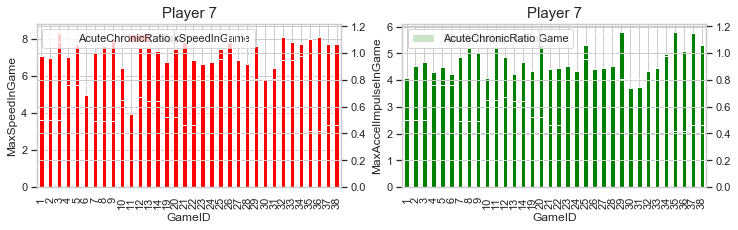

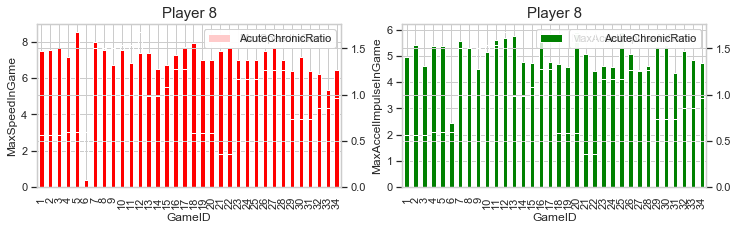

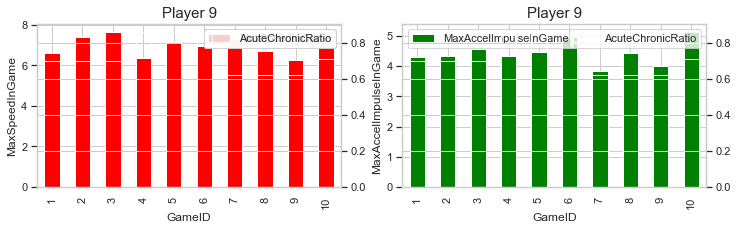

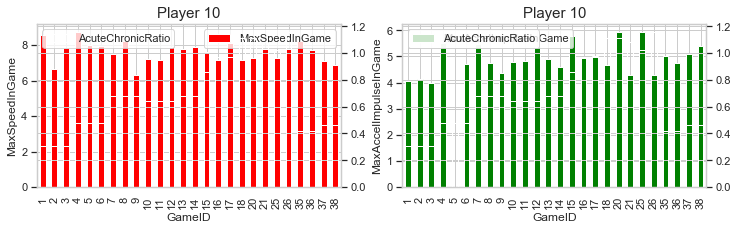

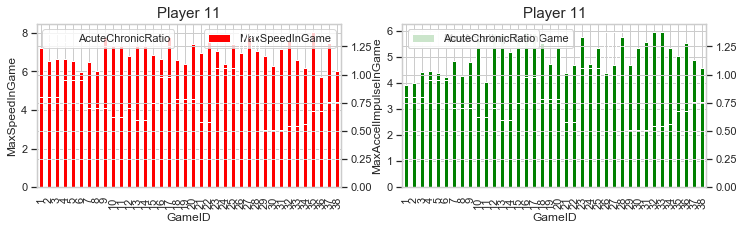

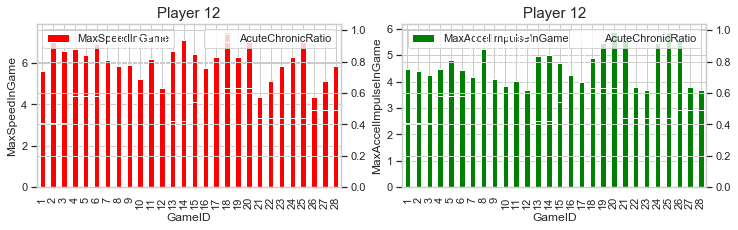

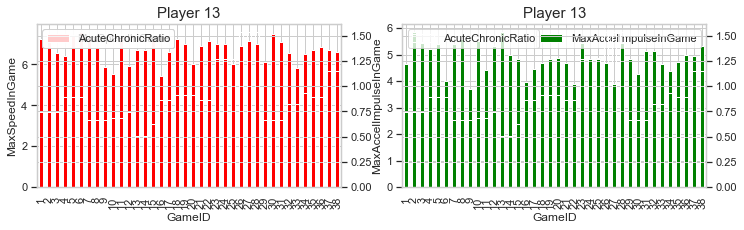

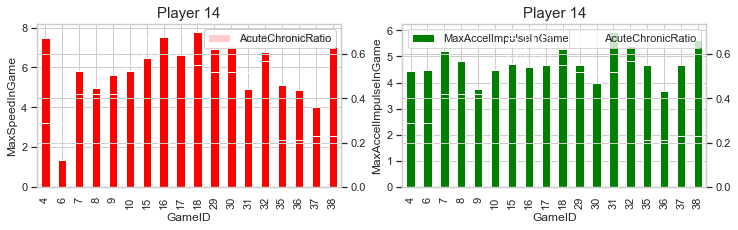

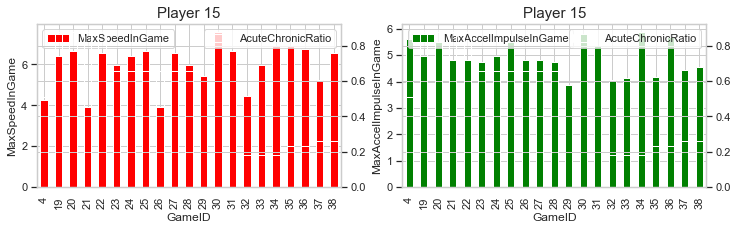

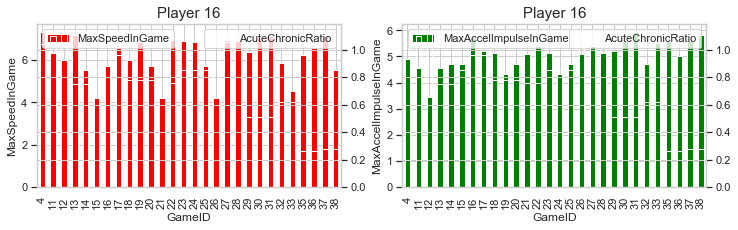

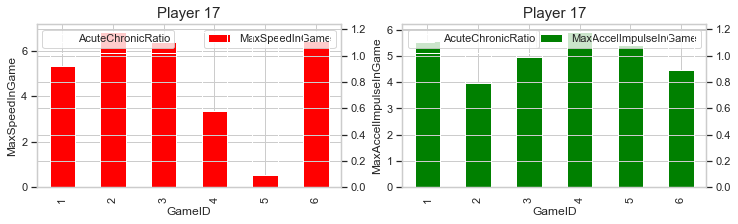

In [318]:
grouped = merged_df.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)

    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="AcuteChronicRatio",fill=False)

    ax1.set_title('Player ' + str(name), fontsize=15)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="GameID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='blue',
                    x='GameID',
                    y="AcuteChronicRatio",fill=False)

    ax2.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

# Performance vs Training load graphs for each game for all players

C:\Users\Sarasadat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


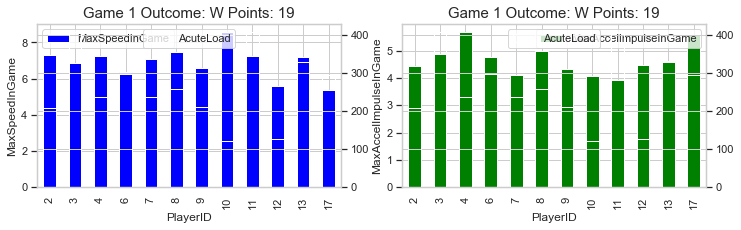

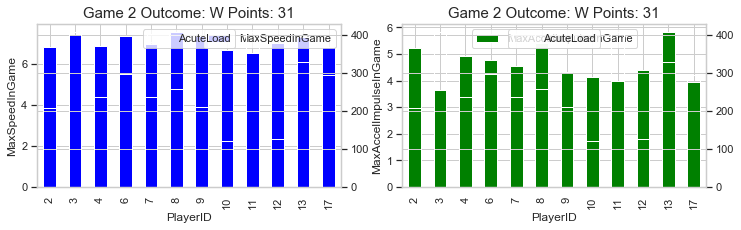

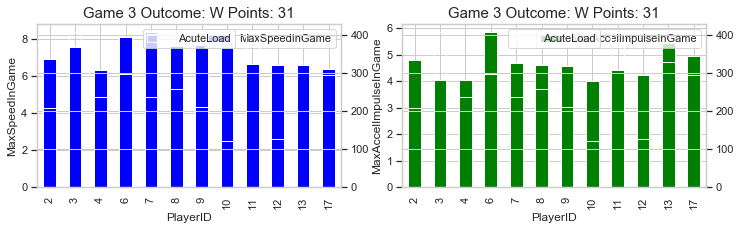

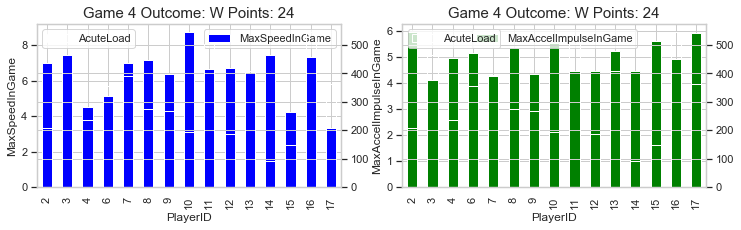

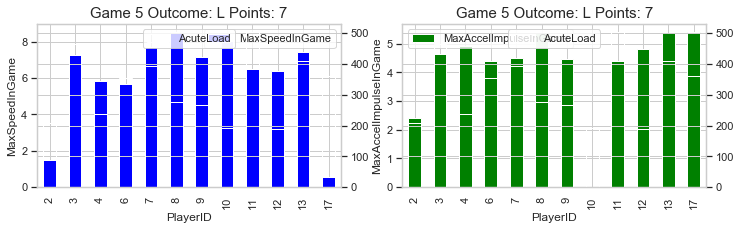

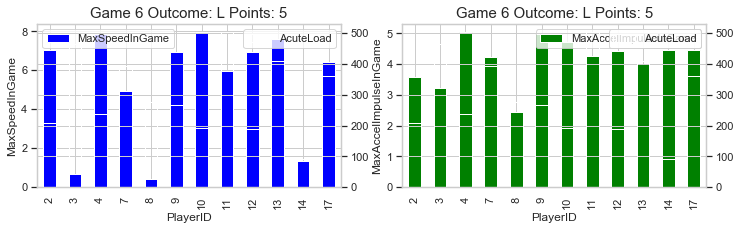

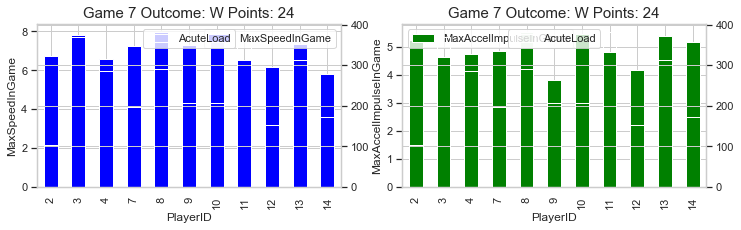

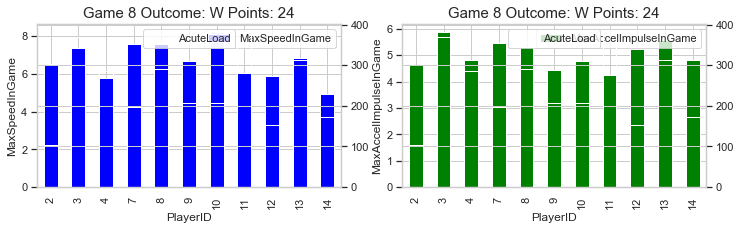

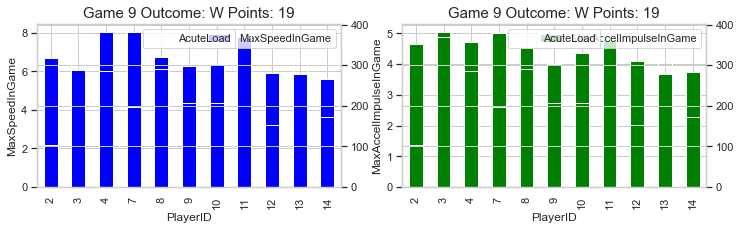

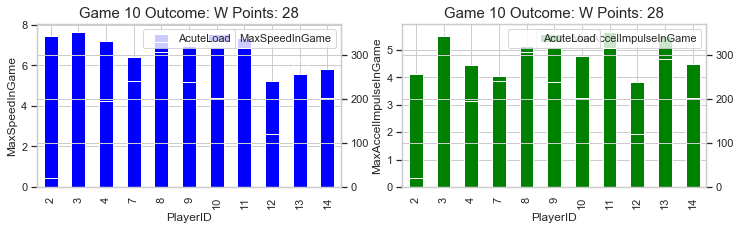

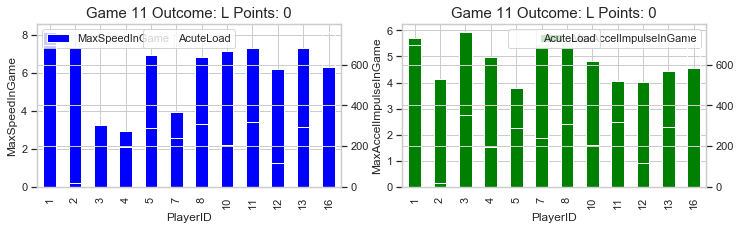

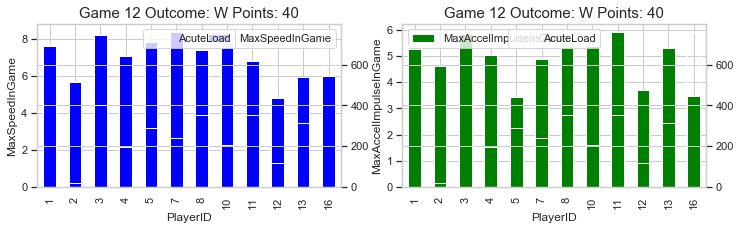

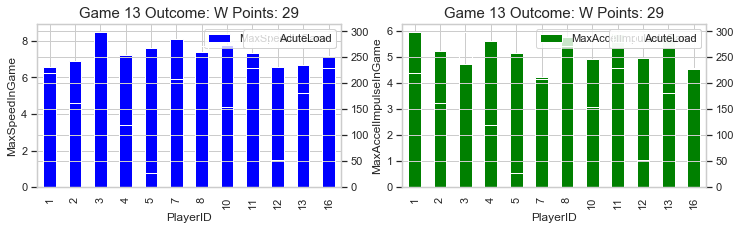

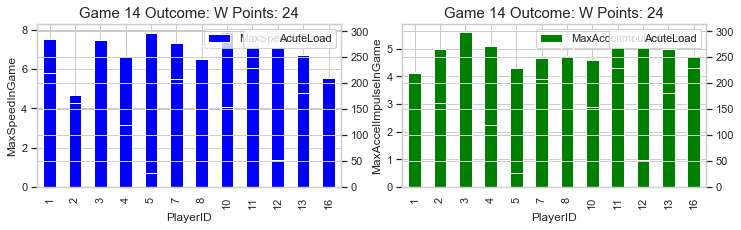

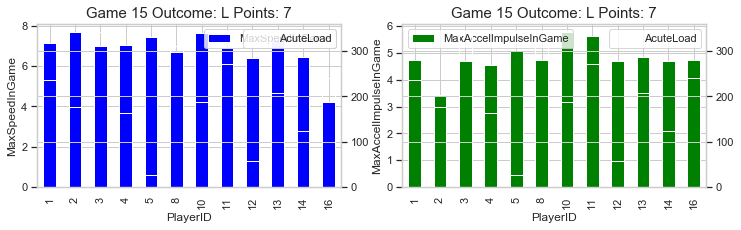

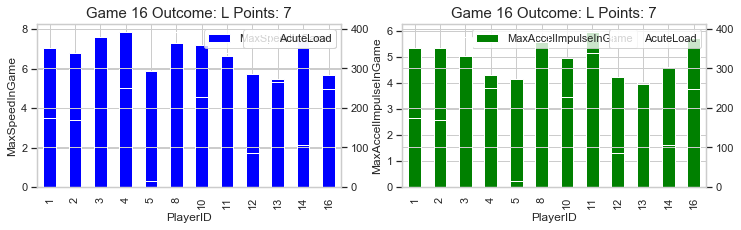

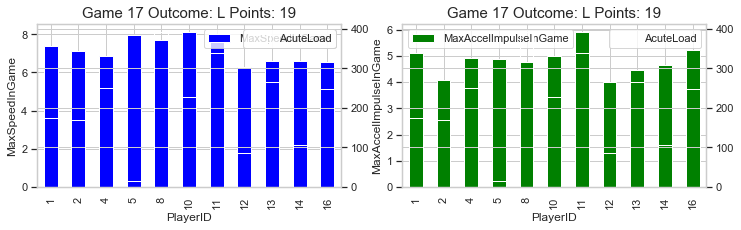

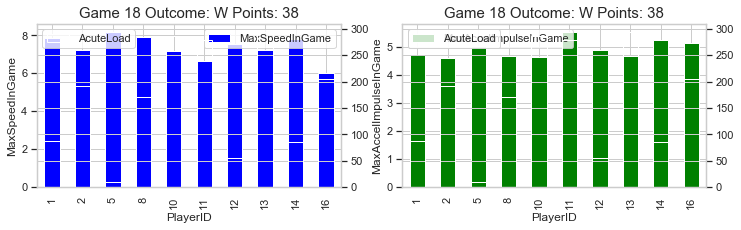

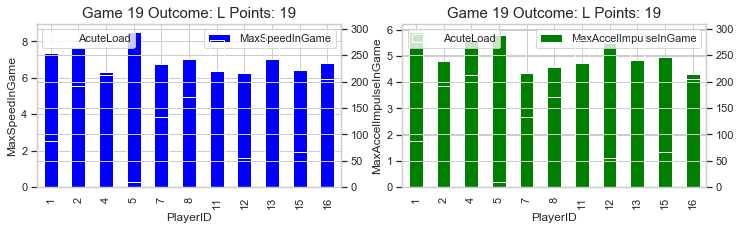

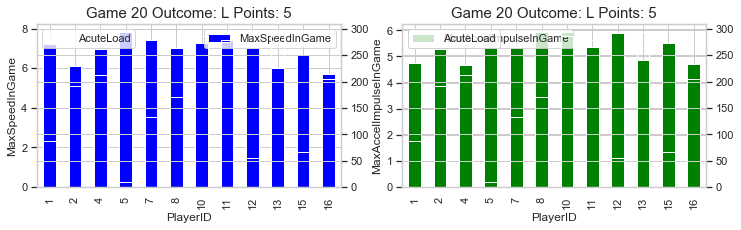

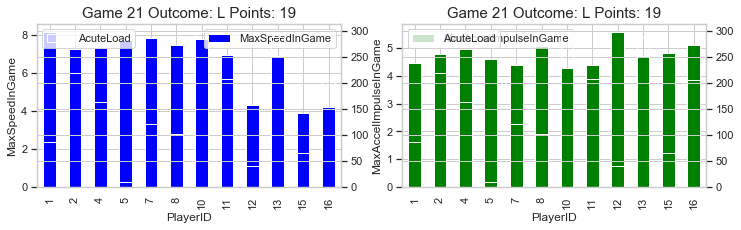

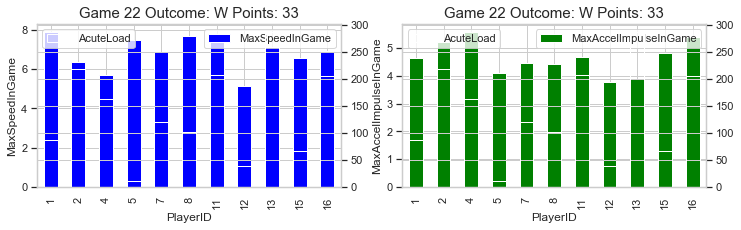

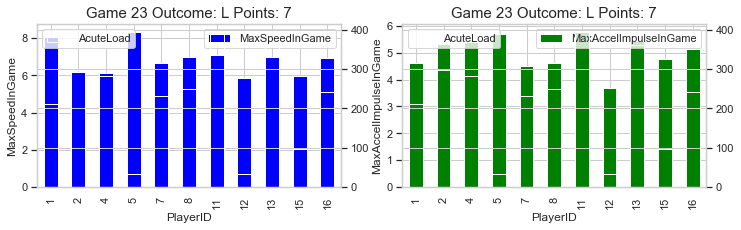

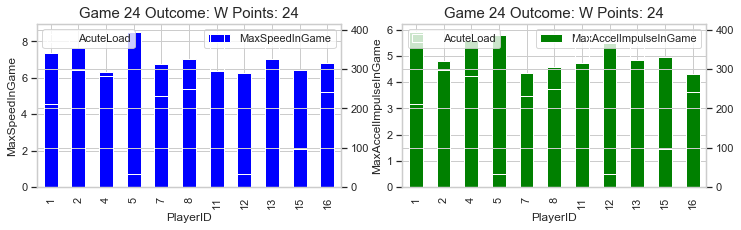

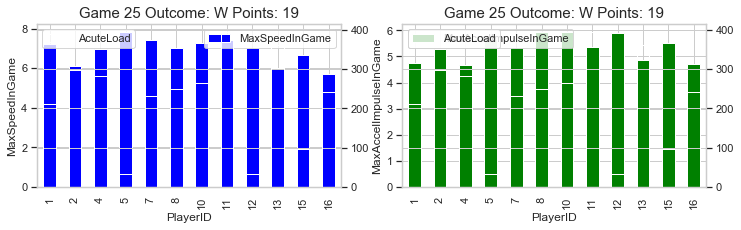

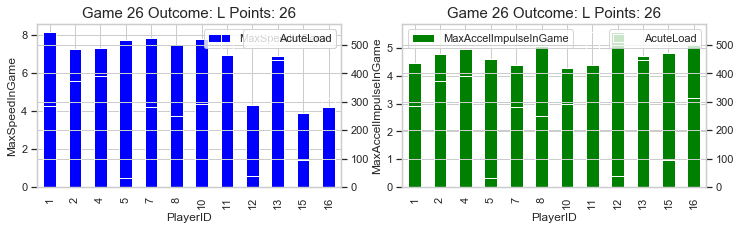

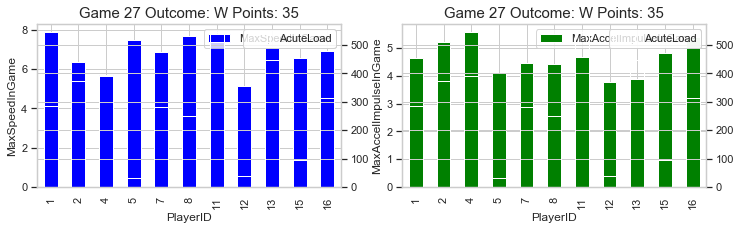

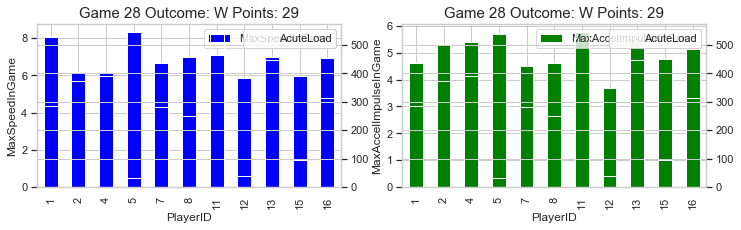

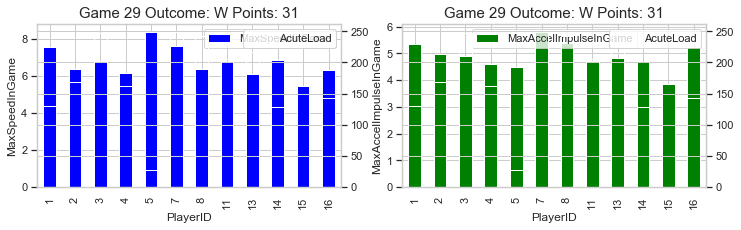

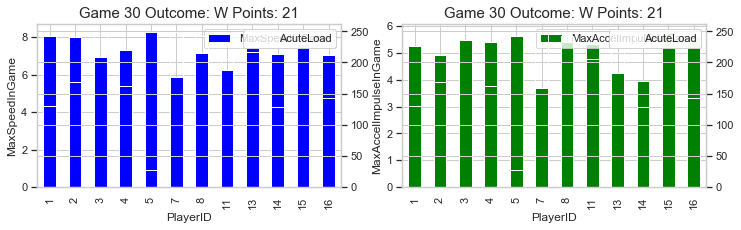

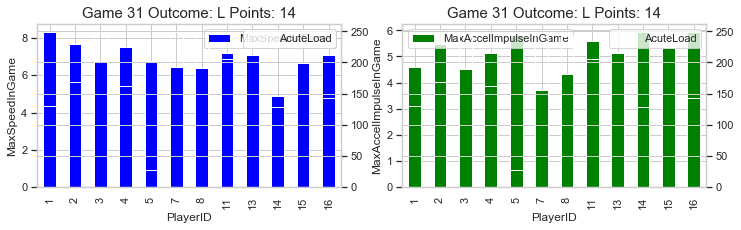

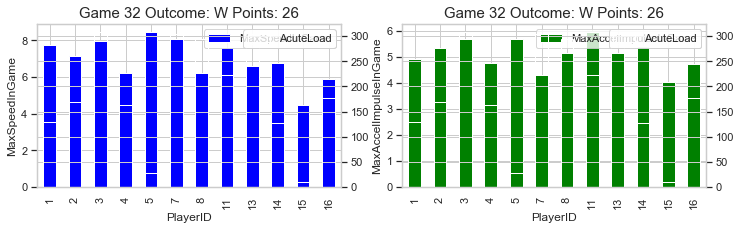

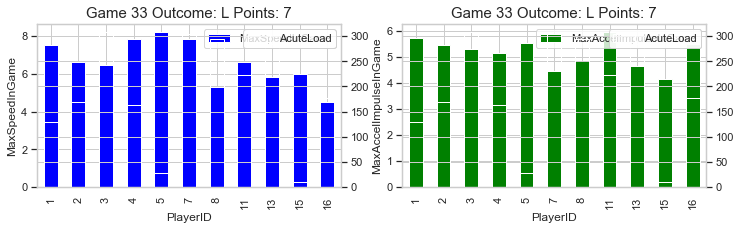

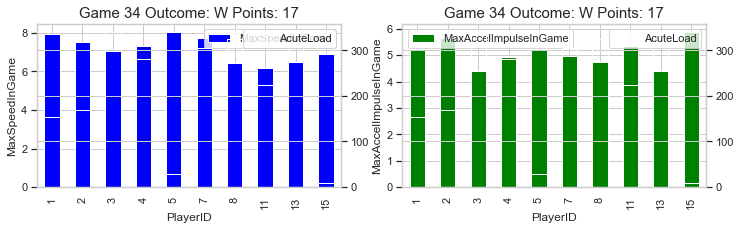

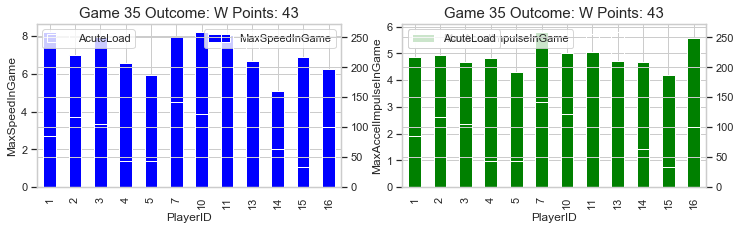

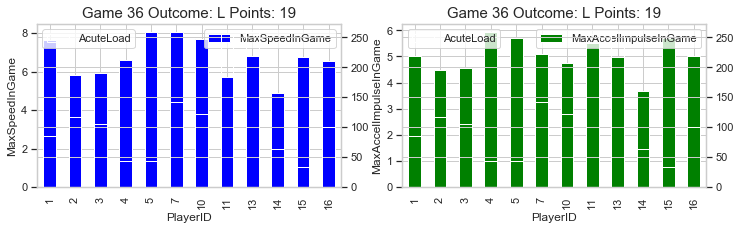

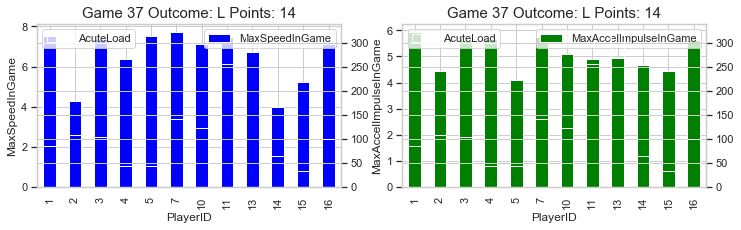

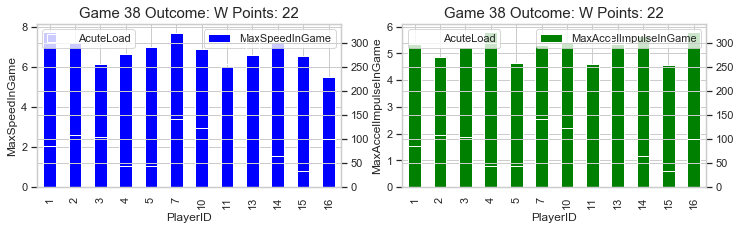

In [319]:
grouped_by_game = merged_df.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)

    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)

plt.show()
plt.close()

# Performance vs wellness graphs per player

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'Fatigue', 'Soreness', 'Desire',
       'Irritability', 'SleepScore', 'SleepHours', 'SleepQuality',
       'TrainingReadiness', 'Pain', 'Illness', 'Nutrition',
       'StandardizedMonitoringScore', 'StandardizedPain',
       'StandardizedIllness', 'StandardizedNutrition',
       'StandardizedTrainingReadiness', 'wellness'],
      dtype='object')
Max speed average
6.935746684112913
6.603067102702249
max accel average
4.903149061781086
4.869268961193322


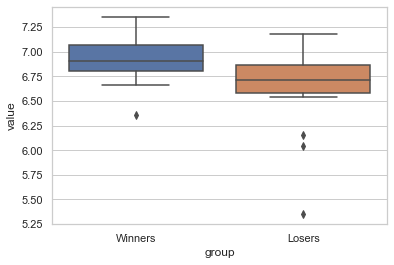

p-value is: 0.0050  t-statistic is: 2.99


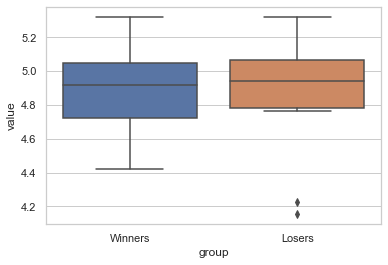

p-value is: 0.7061  t-statistic is: 0.38


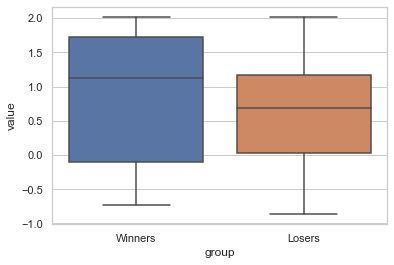

p-value is: 0.4154  t-statistic is: 0.82


In [320]:
import seaborn as sns
from scipy import stats

def box_plot_and_ttest(group1_name, group2_name, column1, column2):
    plt.figure()
    sns.set(context='notebook', style='whitegrid')
    sns.utils.axlabel(xlabel="group", ylabel="value")
    sns.boxplot(data=[column1, column2])
    plt.xticks(plt.xticks()[0], [group1_name, group2_name])
    plt.show()
    t, p = stats.ttest_ind(column1, column2)
    print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
    
    
print(merged_df.columns)
avg_speed_per_game = merged_df[['GameID','Outcome','TeamPoints','MaxSpeedInGame','MaxAccelImpulseInGame','wellness','MonitoringScore','AcuteLoad']].groupby(['GameID','Outcome','TeamPoints'],as_index=False).mean()
winners = avg_speed_per_game[avg_speed_per_game['Outcome'] == 'W']
losers = avg_speed_per_game[avg_speed_per_game['Outcome'] == 'L']

print('Max speed average')
print(winners['MaxSpeedInGame'].mean())
print(losers['MaxSpeedInGame'].mean())
print('max accel average')
print(winners['MaxAccelImpulseInGame'].mean())
print(losers['MaxAccelImpulseInGame'].mean())

box_plot_and_ttest('Winners', 'Losers', winners['MaxSpeedInGame'], losers['MaxSpeedInGame'])
box_plot_and_ttest('Winners', 'Losers', winners['MaxAccelImpulseInGame'], losers['MaxAccelImpulseInGame'])
box_plot_and_ttest('Winners', 'Losers', winners['wellness'], losers['wellness'])


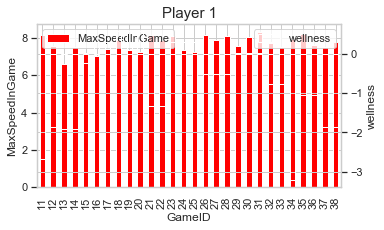

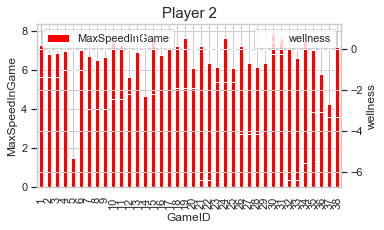

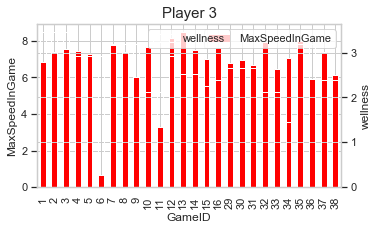

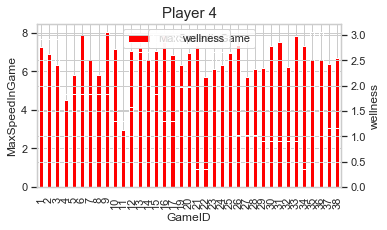

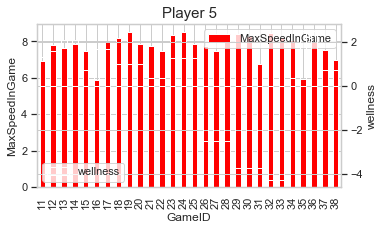

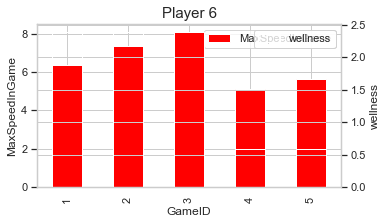

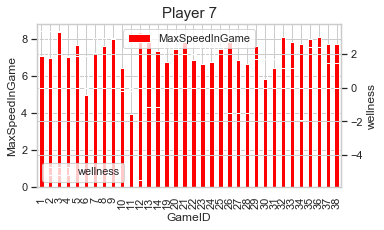

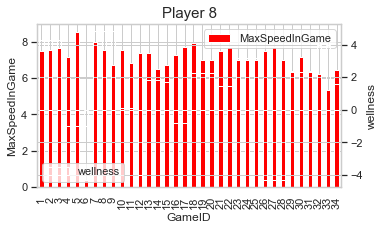

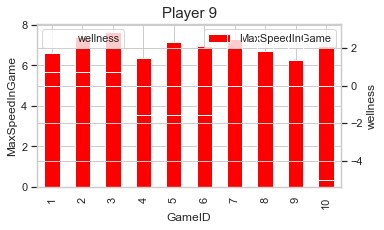

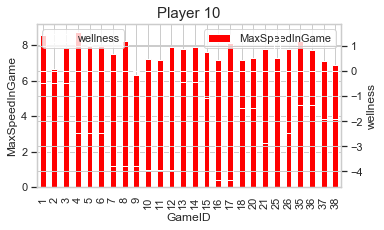

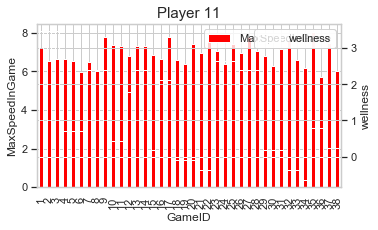

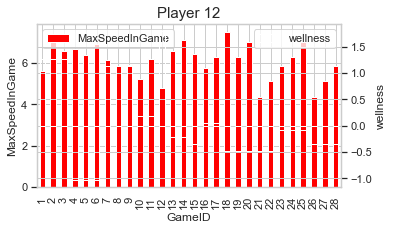

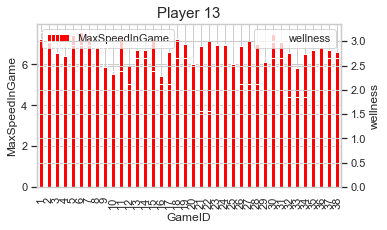

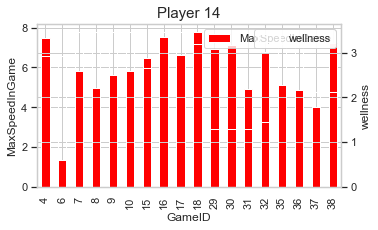

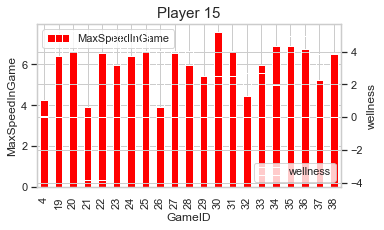

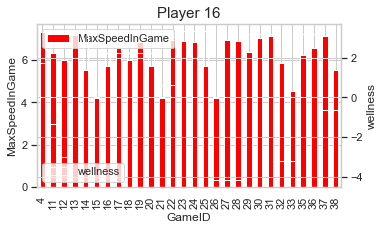

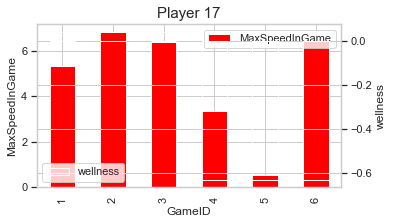

In [321]:
grouped = merged_df.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)

    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="wellness",fill=False)
    ax3.set_ylabel('wellness')
    ax1.set_title('Player ' + str(name), fontsize=15)



plt.show()
plt.close()

# Performance vs wellness and nutrition load graphs for each game for all players

C:\Users\Sarasadat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


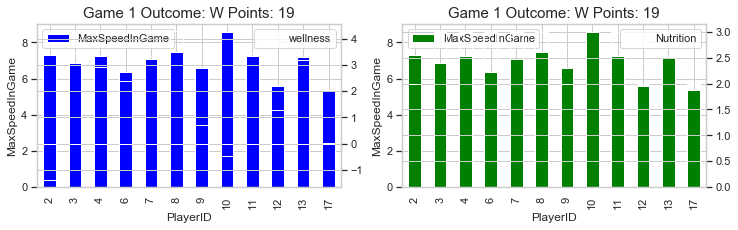

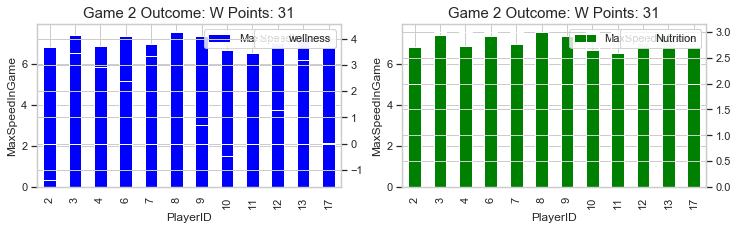

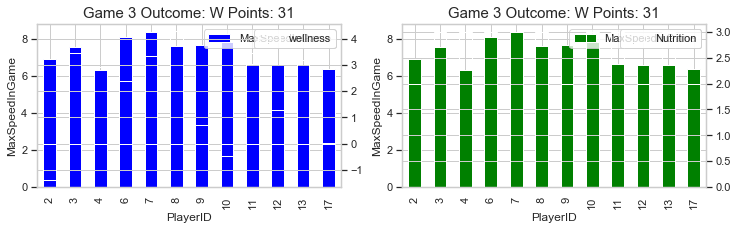

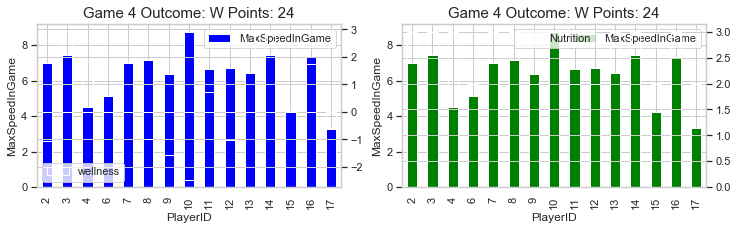

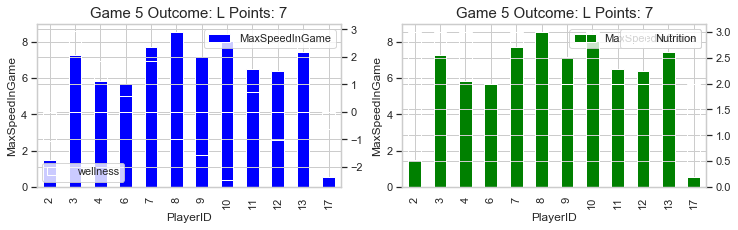

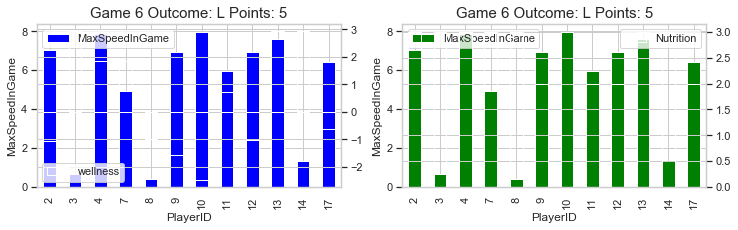

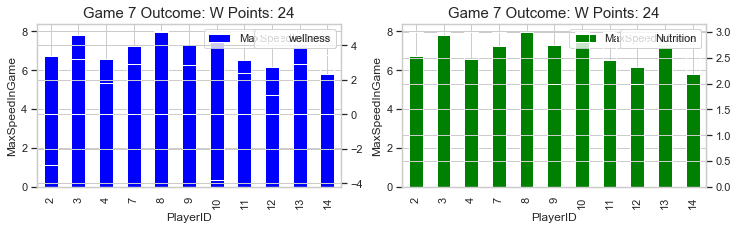

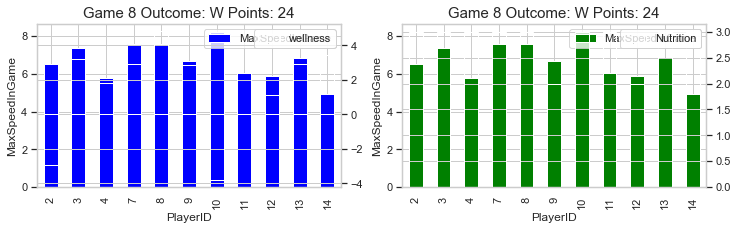

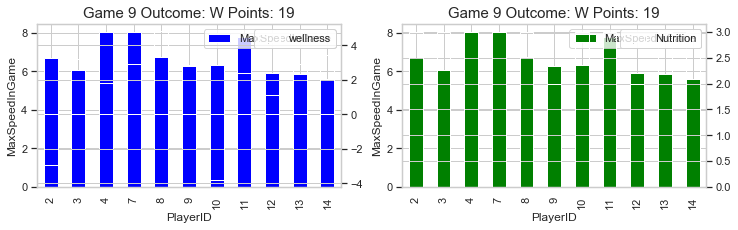

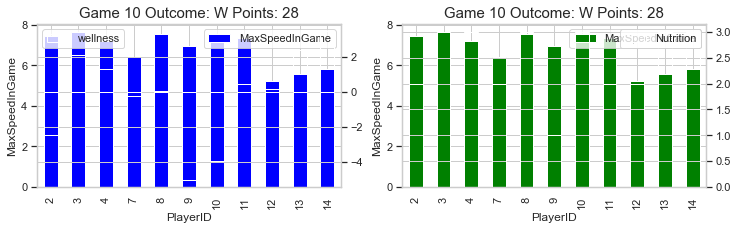

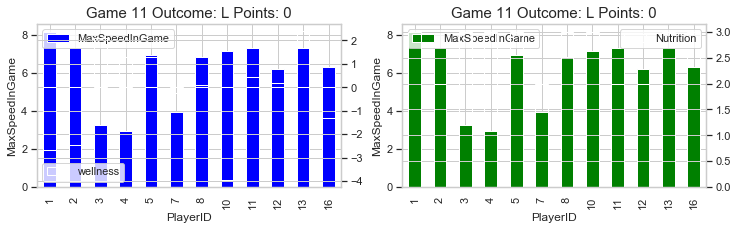

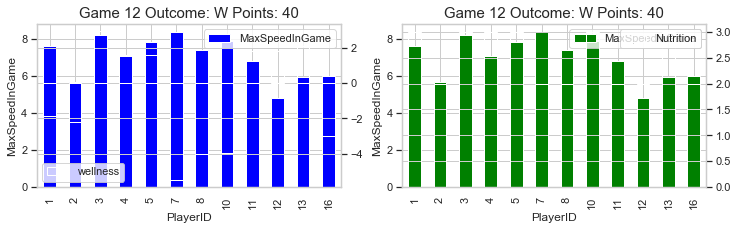

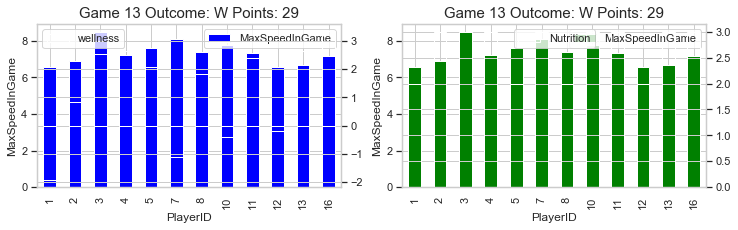

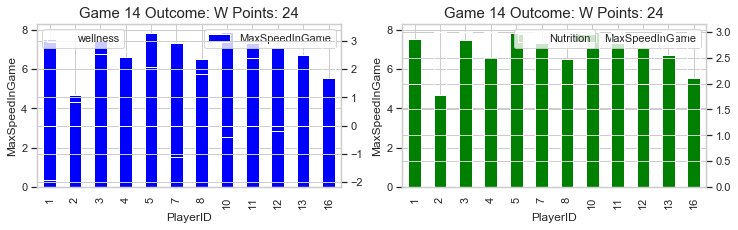

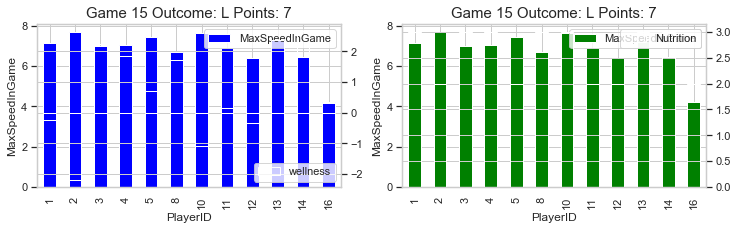

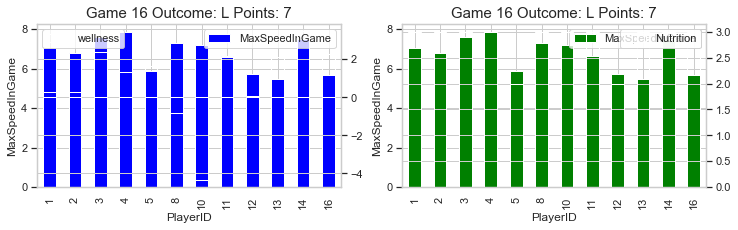

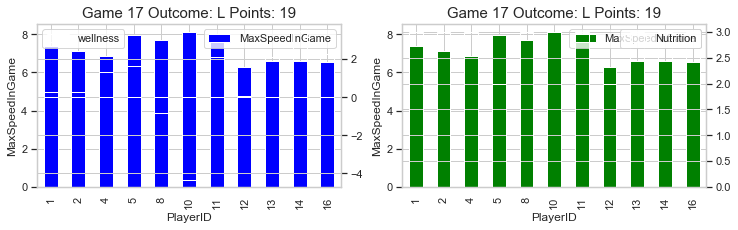

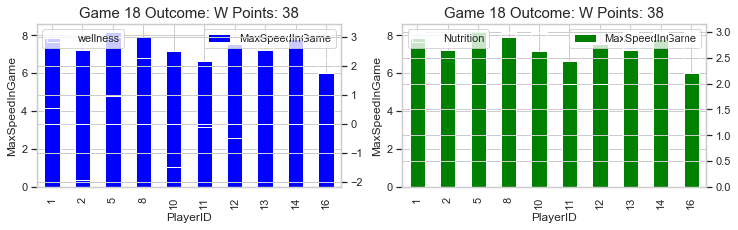

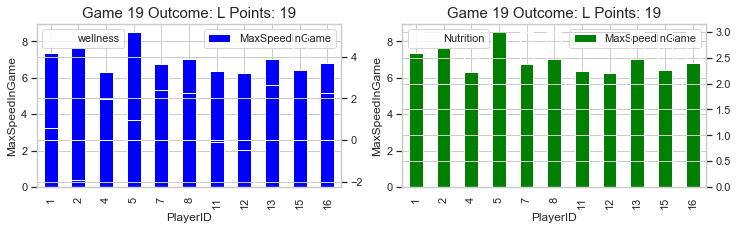

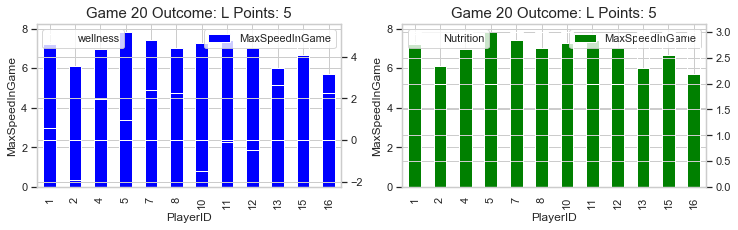

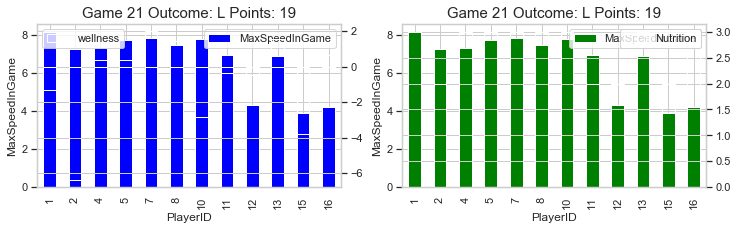

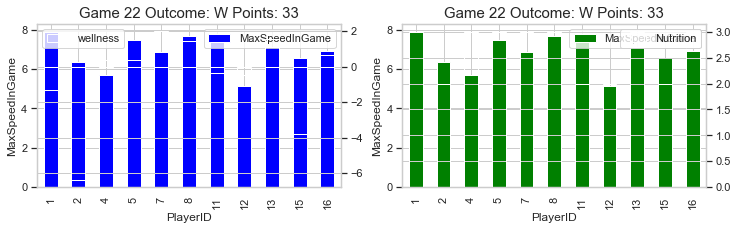

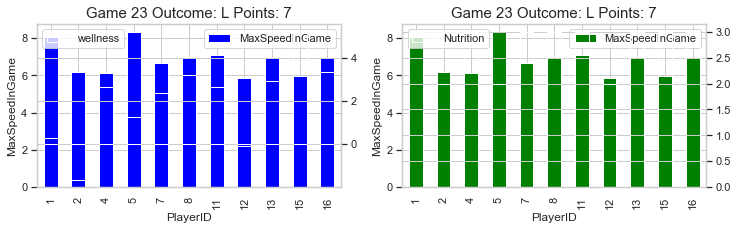

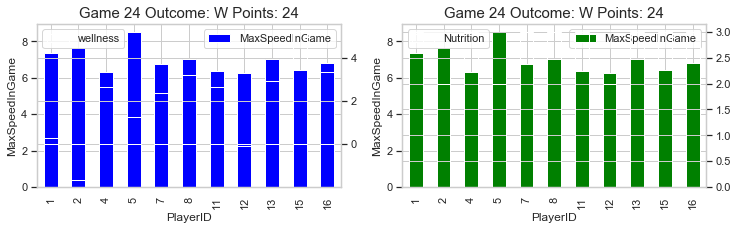

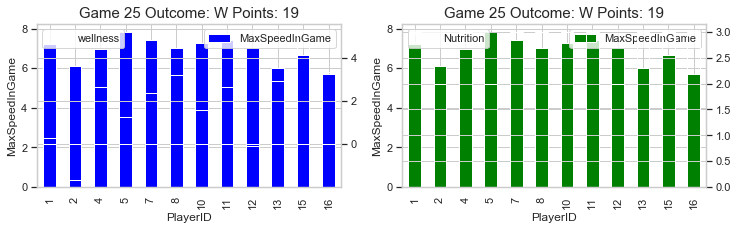

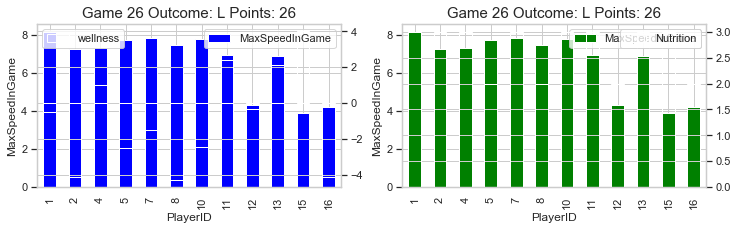

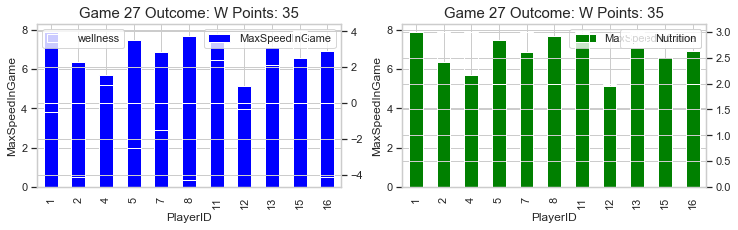

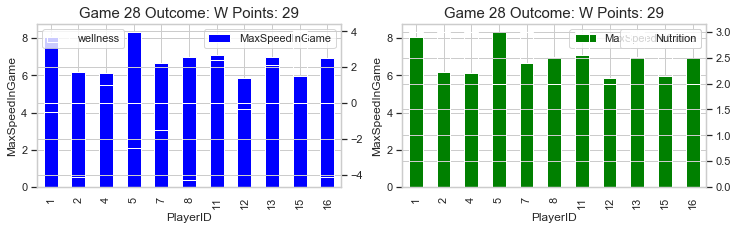

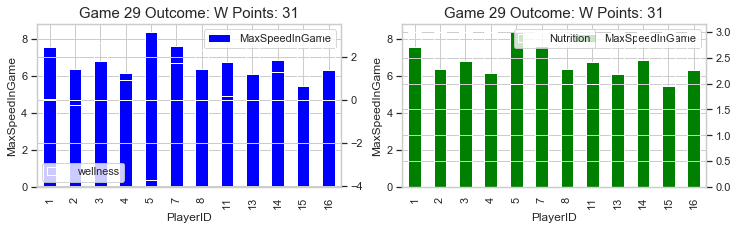

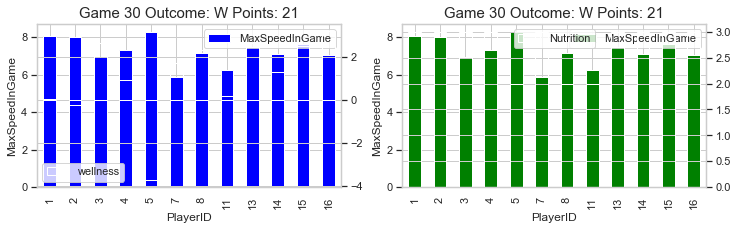

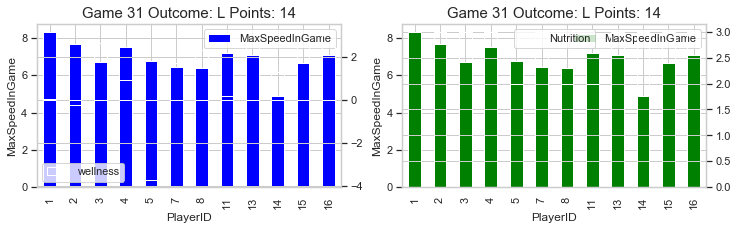

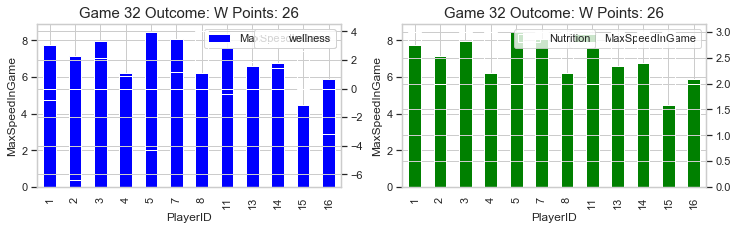

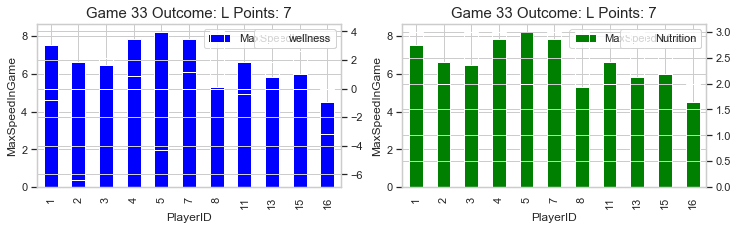

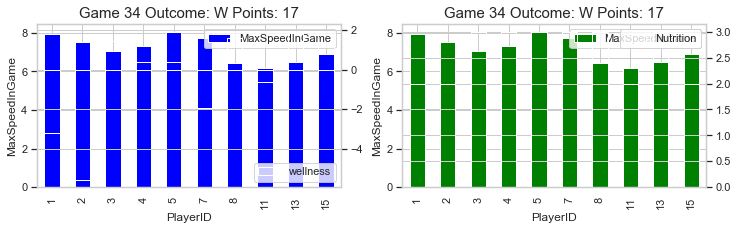

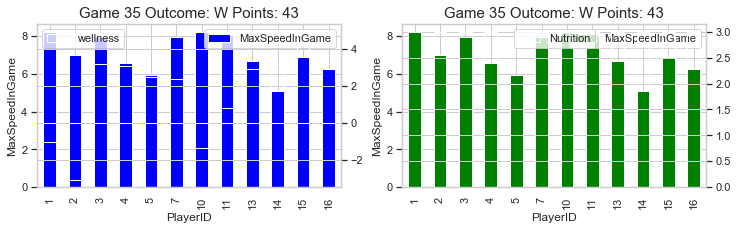

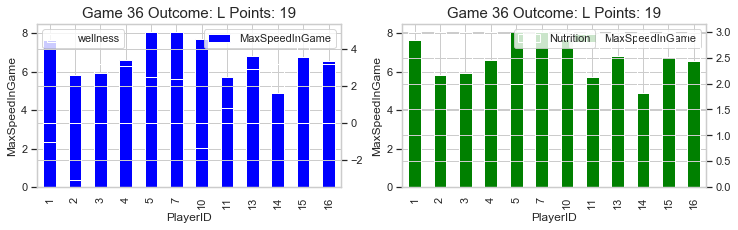

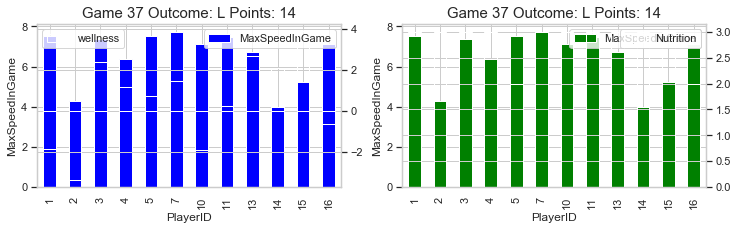

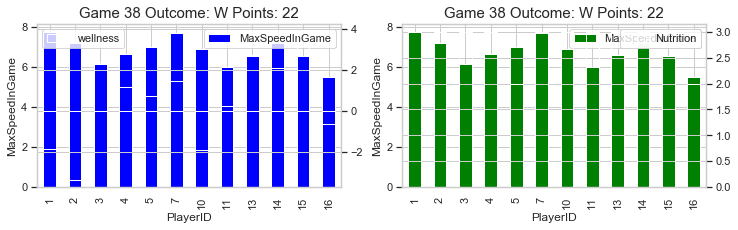

In [322]:
grouped_by_game = merged_df.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)

    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="wellness",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxSpeedInGame")
    ax2.set_ylabel('MaxSpeedInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="Nutrition",fill=False)

plt.show()
plt.close()

In [323]:
merged_df = rpe_df.merge(wellness_df,
    how='inner', on= ['Date','PlayerID']).drop_duplicates()

Unfortunately there is no special relationship between the clusters for prformance, training and wellness.

In [324]:
merged_df.columns

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteChronicRatio', 'ObjectiveRating',
       'FocusRating', 'BestOutOfMyself', 'AcuteLoad', 'ChronicLoad',
       'MonitoringScore', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'SleepScore', 'SleepHours', 'SleepQuality', 'TrainingReadiness', 'Pain',
       'Illness', 'Nutrition', 'StandardizedMonitoringScore',
       'StandardizedPain', 'StandardizedIllness', 'StandardizedNutrition',
       'StandardizedTrainingReadiness', 'wellness'],
      dtype='object')

# Training load on the day before and today's wellness

In [325]:
print(rpe_df.columns)
print(wellness_df.head())
yesterday_rpe = rpe_df.copy()[['Date','PlayerID','Training','SessionLoad','RPE','DailyLoad']]
print(yesterday_rpe.head())
yesterday_rpe['Date'] = pd.to_datetime(yesterday_rpe['Date'], format='%Y-%m-%d')
yesterday_rpe['Date'] = pd.DatetimeIndex(yesterday_rpe['Date']) + pd.DateOffset(1)
print(yesterday_rpe.head())

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteChronicRatio', 'ObjectiveRating',
       'FocusRating', 'BestOutOfMyself', 'AcuteLoad', 'ChronicLoad'],
      dtype='object')
         Date  PlayerID  MonitoringScore  Fatigue  Soreness  Desire  \
0  2018-07-21         1               13        3         3       2   
1  2018-07-21         2               19        4         3       4   
2  2018-07-21         3               19        3         3       5   
3  2018-07-21         4               15        2         3       5   
4  2018-07-21         5               20        5         3       4   

   Irritability  SleepScore  SleepHours  SleepQuality  TrainingReadiness  \
0             3        16.0        8.00             2                  0   
1             4        32.0        8.00             4                  0   
2             4        32.0        8.00             4                100   
3             4         6.5  

In [326]:
wellness_df['Date'] = pd.to_datetime(wellness_df['Date'],format='%Y-%m-%d')
wellness_with_yesterday_training = yesterday_rpe.merge(wellness_df,
    how='inner', on= ['Date','PlayerID'])[['Date','PlayerID','DailyLoad',
                                           'MonitoringScore','TrainingReadiness',
                                           'Pain','Illness','Nutrition',
                                           'wellness']].drop_duplicates()


In [327]:
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0               19                 80   
346  2017-08-18         1      510.0               20                 85   
378  2017-08-19         1     1230.0               21                  0   
408  2017-08-20         1        0.0               20                100   
454  2017-08-22         1      670.0               17                 85   
...         ...       ...        ...              ...                ...   
8259 2018-07-15         1        0.0               21                  0   
8268 2018-07-17         1      240.0               18                  0   
8284 2018-07-18         1      180.0               15                  0   
8302 2018-07-19         1        0.0               20                  0   
8310 2018-07-20         1      180.0               16                  0   

      Pain  Illness  Nutrition  wellness  
315      1        3          3  1.860020  
3

In [328]:
wellness_with_yesterday_training.sort_values(by=['Date', 'PlayerID'], inplace=True)

# for this example, with diff, I think this syntax is a bit clunky
# but for more general examples, this should be good.  But can we do better?
wellness_with_yesterday_training['wellness_diffs'] = wellness_with_yesterday_training.groupby(['PlayerID'])['wellness'].transform(lambda x: x.diff()) 

wellness_with_yesterday_training.sort_index(inplace=True)
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0               19                 80   
346  2017-08-18         1      510.0               20                 85   
378  2017-08-19         1     1230.0               21                  0   
408  2017-08-20         1        0.0               20                100   
454  2017-08-22         1      670.0               17                 85   
...         ...       ...        ...              ...                ...   
8259 2018-07-15         1        0.0               21                  0   
8268 2018-07-17         1      240.0               18                  0   
8284 2018-07-18         1      180.0               15                  0   
8302 2018-07-19         1        0.0               20                  0   
8310 2018-07-20         1      180.0               16                  0   

      Pain  Illness  Nutrition  wellness  wellness_diffs  
315      1        3         

In [329]:
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 2)])
processed = wellness_with_yesterday_training.copy()
processed['DailyLoad'] = StandardScaler().fit_transform(wellness_with_yesterday_training[['DailyLoad']])
print(processed[(processed['PlayerID'] == 2)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
316  2017-08-17         2       40.0               18                 80   
343  2017-08-18         2      870.0               19                 75   
385  2017-08-19         2     1170.0               22                  0   
409  2017-08-20         2        0.0               23                  0   
423  2017-08-21         2        0.0               20                 85   
...         ...       ...        ...              ...                ...   
8258 2018-07-15         2       60.0               25                  0   
8270 2018-07-17         2      240.0               19                  0   
8286 2018-07-18         2      280.0               24                  0   
8303 2018-07-19         2        0.0               22                  0   
8311 2018-07-20         2      240.0               20                  0   

      Pain  Illness  Nutrition  wellness  wellness_diffs  
316      1        3         

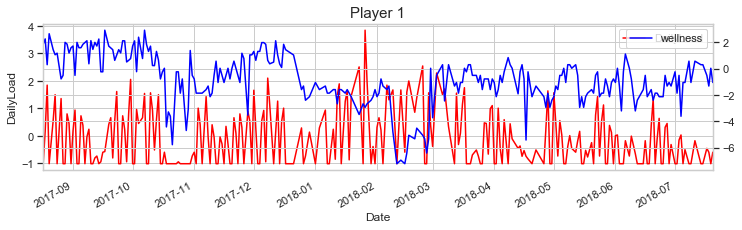

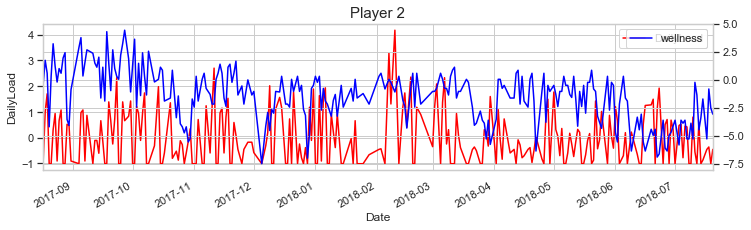

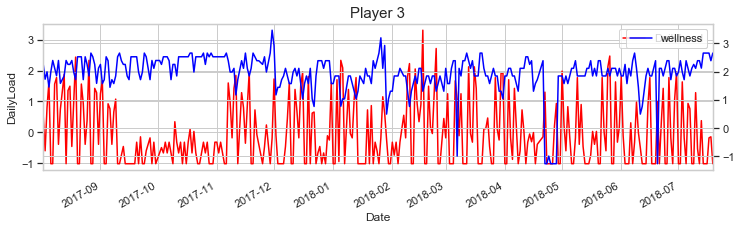

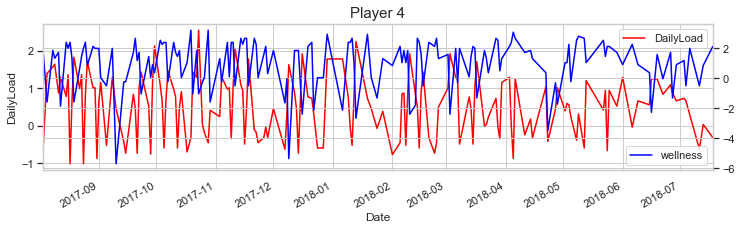

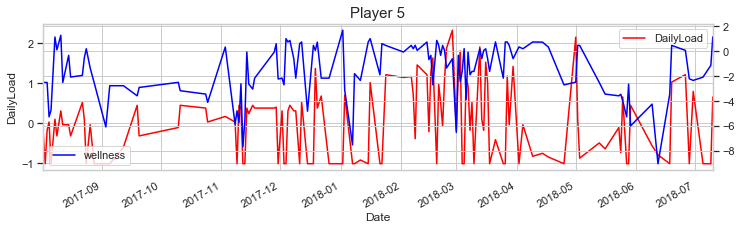

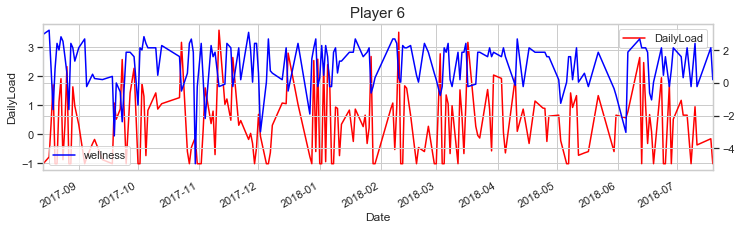

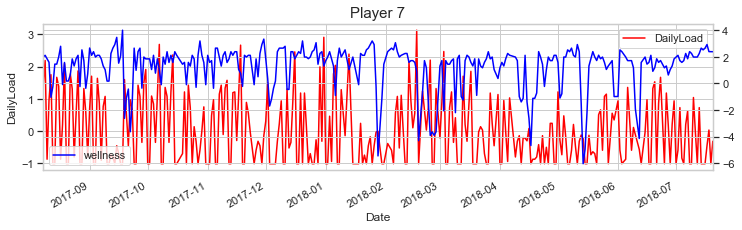

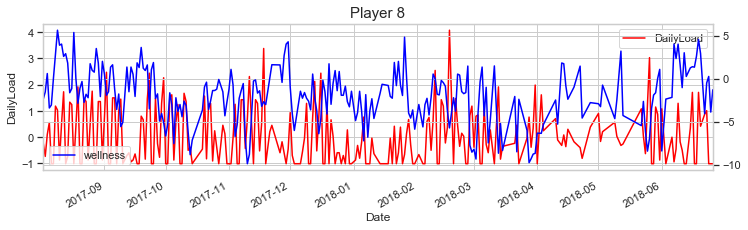

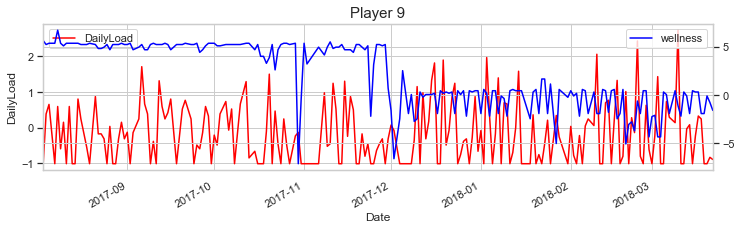

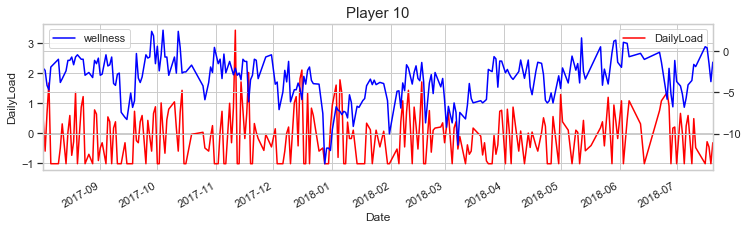

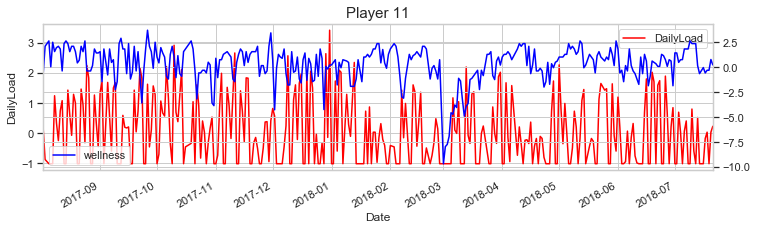

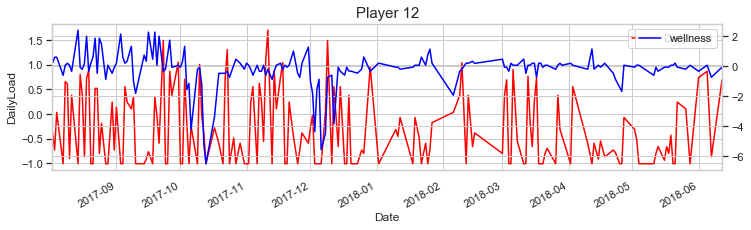

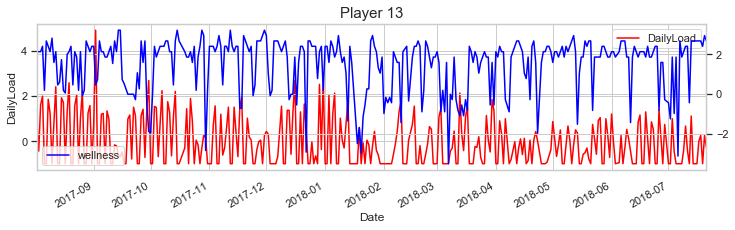

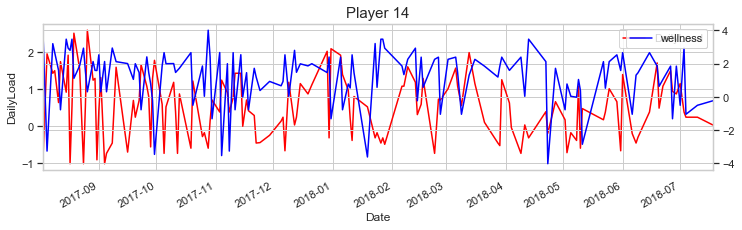

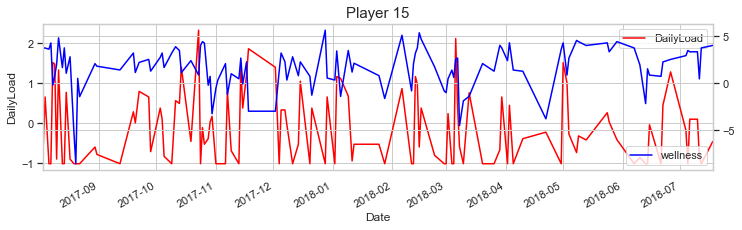

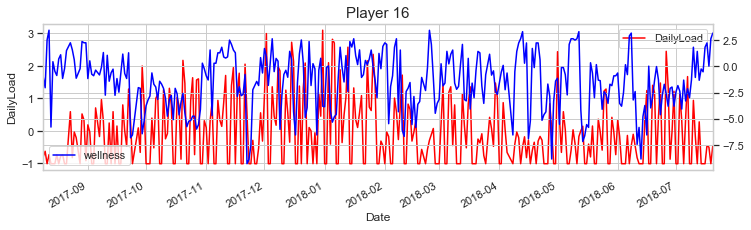

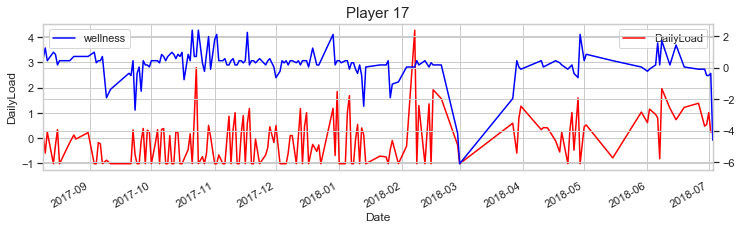

In [330]:
grouped = processed.groupby(['PlayerID'])

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(111)

    group.plot.line(ax=ax1, color='red',x="Date",y="DailyLoad")
    ax1.set_ylabel('DailyLoad')
    ax3 = ax1.twinx()
    group.plot.line(ax=ax3, color='blue',x="Date",y="wellness")

    ax1.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

In [331]:
def scatter_plot(df, x, y, title=None):
    df.plot.scatter(x, y)
    if title:
        plt.title(title)
    plt.show()



                               GEE Regression Results                              
Dep. Variable:                    wellness   No. Observations:                 3928
Model:                                 GEE   No. clusters:                       17
Method:                        Generalized   Min. cluster size:                 120
                      Estimating Equations   Max. cluster size:                 343
Family:                           Gaussian   Mean cluster size:               231.1
Dependence structure:         Exchangeable   Num. iterations:                     4
Date:                     Mon, 09 Dec 2019   Scale:                           5.049
Covariance type:                    robust   Time:                         18:53:35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2495      0.328      0.761      0.447      -0.393       0.892
DailyLo

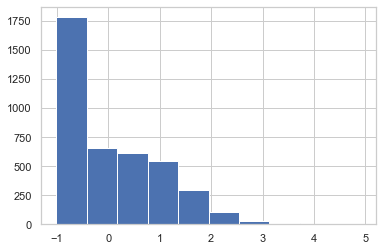

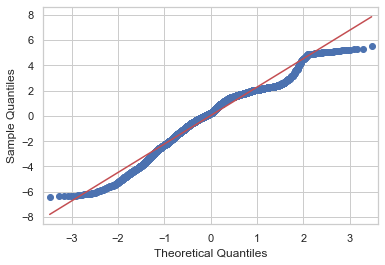

C:\Users\Sarasadat\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


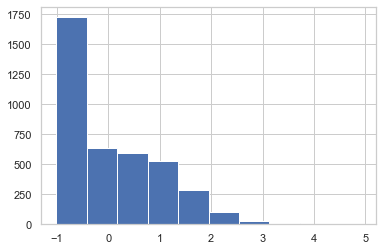

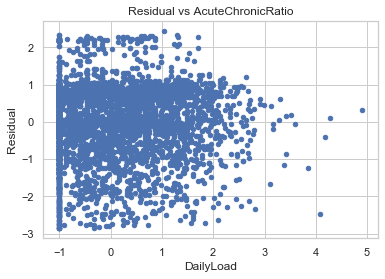

In [332]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

fam = sm.families.Gaussian()
ind = sm.cov_struct.Exchangeable()

Q1 = processed['wellness'].quantile(0.25)
Q3 = processed['wellness'].quantile(0.75)
IQR = Q3 - Q1
processed['DailyLoad'].hist()
# removed the wellness outliers
processed = processed[(processed['wellness'] > Q1 - (1.5 * IQR)) & (processed['wellness'] < Q3 + (1.5 * IQR))]
mod = smf.gee("wellness ~ DailyLoad", "PlayerID", processed, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())
qqplot(res.resid, line='s')
plt.show()

processed['Residual'] = (res.resid - res.resid.mean()) / res.resid.std()
processed['DailyLoad'].hist()

scatter_plot(processed, 'DailyLoad', 'Residual', 'Residual vs AcuteChronicRatio')

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: wellness  
No. Observations: 3911    Method:             REML      
No. Groups:       17      Scale:              3.2630    
Min. group size:  119     Likelihood:         -7905.1759
Max. group size:  342     Converged:          Yes       
Mean group size:  230.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.245    0.337  0.729 0.466 -0.415  0.905
DailyLoad     -0.107    0.029 -3.640 0.000 -0.165 -0.049
Group Var      1.912    0.378                           



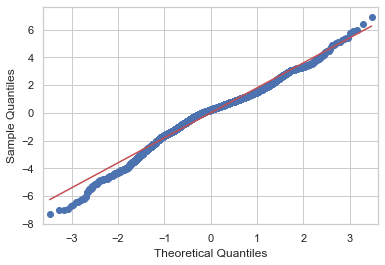

In [333]:
processed = processed.dropna()

mixed = smf.mixedlm("wellness ~ DailyLoad", processed, groups = processed["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())
qqplot(mixed_fit.resid, line='s')
plt.show()

From the qqplots, we can see that the random mixed model is a better fit compared to the gee model. Even though the coefficients in both models are similiar.

In [334]:
processed['wellness'].std()

2.2462624414912304

In [335]:
processed['wellness'].quantile(0.25)

-1.0484484580700242

In [336]:
processed['wellness'].median()

0.4501752655233835

In [337]:
processed['wellness'].quantile(0.75)

1.9832673880574283

In [338]:
processed['DailyLoad'].std()

1.0006629773212115

In [339]:
processed['DailyLoad'].quantile(0.25)

-1.0128931791732334

In [340]:
processed['DailyLoad'].quantile(0.4)

-0.559982470183608

In [341]:
processed['DailyLoad'].median()

-0.21855747417604443

In [342]:
processed['DailyLoad'].quantile(0.60)

0.148416331056575

In [343]:
processed['DailyLoad'].quantile(0.75)

0.7290710861714792

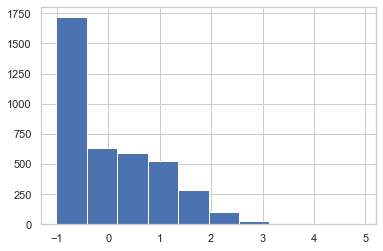

In [344]:
processed['DailyLoad'].hist()

# Performance vs yesterday's daily load

In [345]:
gps_df = pd.read_csv('./processed_data/processed_gps.csv')
gps_df = gps_df.drop(columns=['Unnamed: 0'])
gps_df['Date'] = pd.to_datetime(gps_df['Date'],format='%Y-%m-%d')
print(gps_df.head())

        Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0 2017-11-30       1       W          19         2        7.284728   
1 2017-11-30       1       W          19         3        6.852436   
2 2017-11-30       1       W          19         4        7.267784   
3 2017-11-30       1       W          19         6        6.338894   
4 2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  
0               4.423615  
1               4.888893  
2               5.694449  
3               4.777782  
4               4.091273  


In [346]:
speed_vs_yesterday_load = gps_df.merge(yesterday_rpe,
    how='inner', on= ['Date','PlayerID'])[['Date','PlayerID','DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']].drop_duplicates()

processed_speed = speed_vs_yesterday_load.copy()
processed_speed = processed_speed[(processed_speed['MaxSpeedInGame'] >= 5) & (processed_speed['MaxSpeedInGame'] <= 9)]
processed_speed[['DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']] = StandardScaler().fit_transform(processed_speed[['DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']])


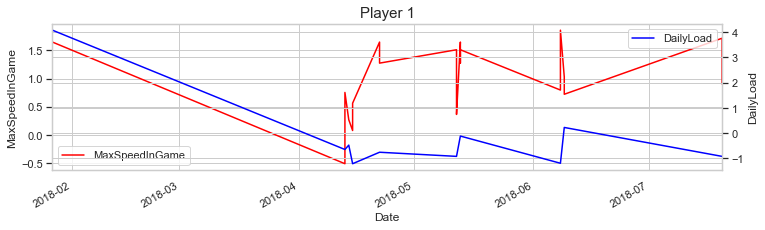

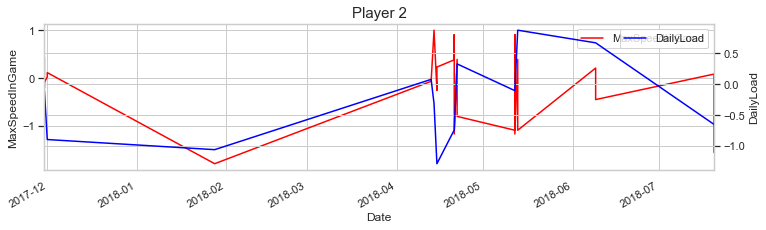

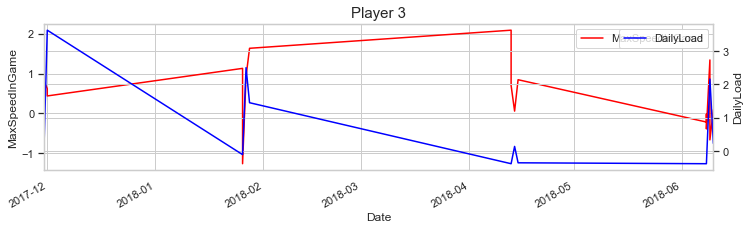

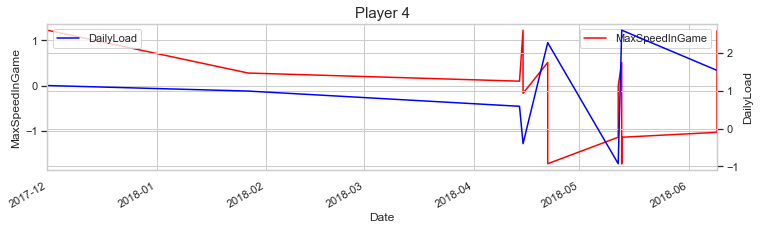

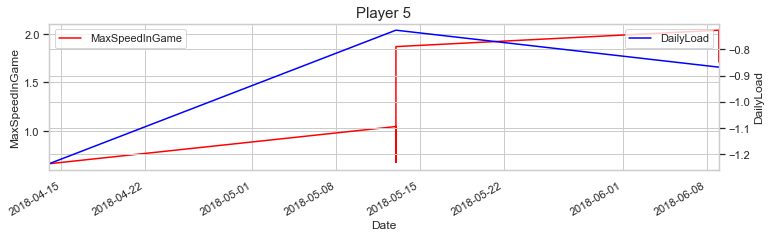

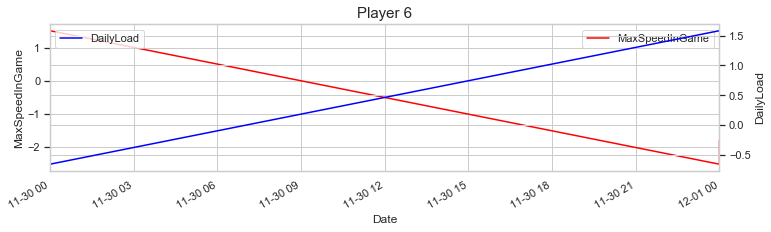

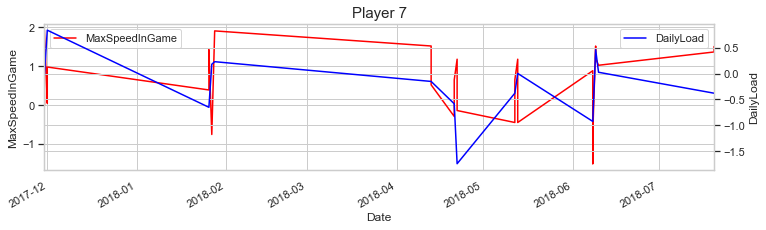

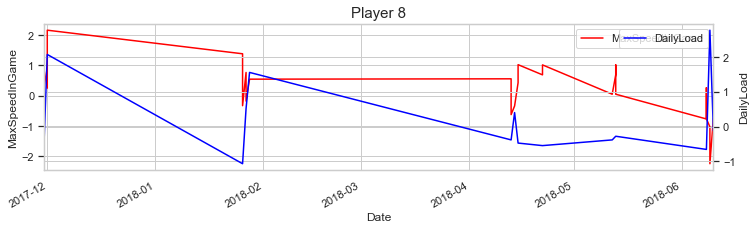

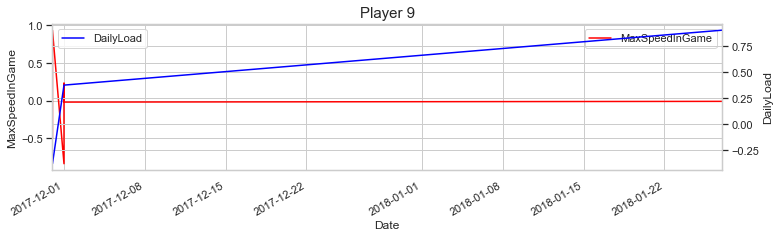

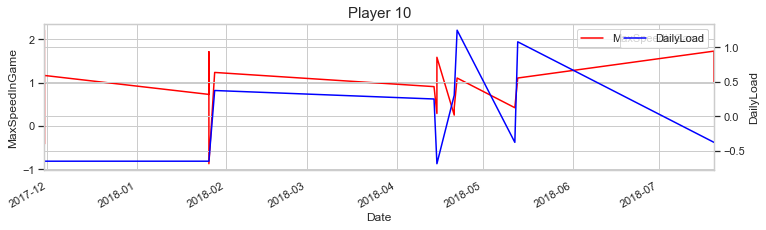

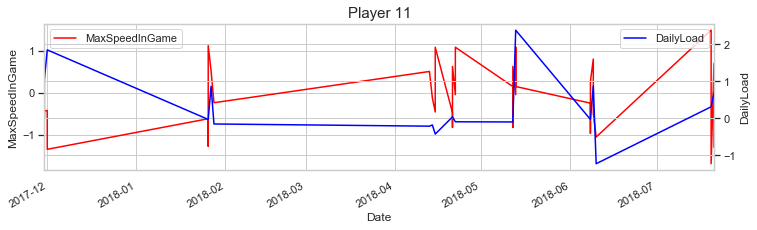

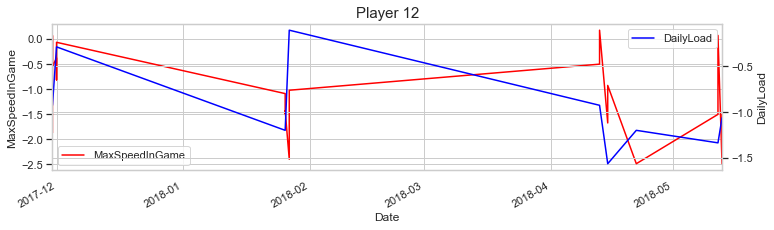

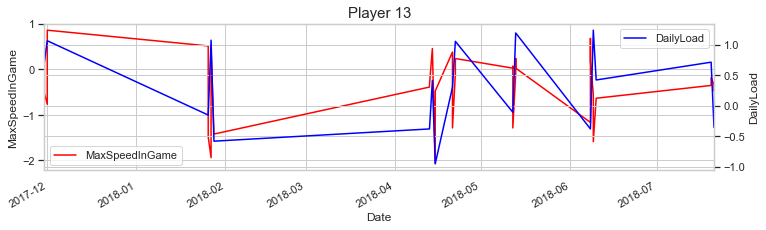

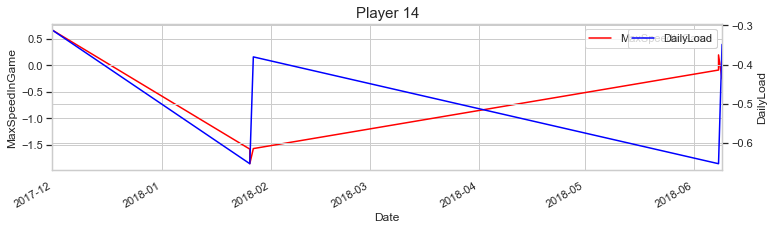

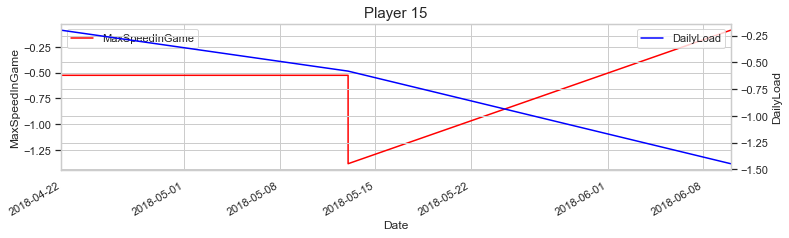

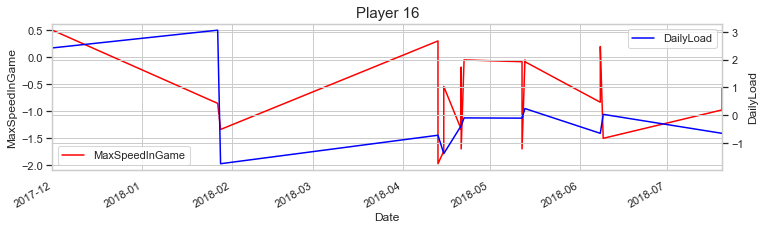

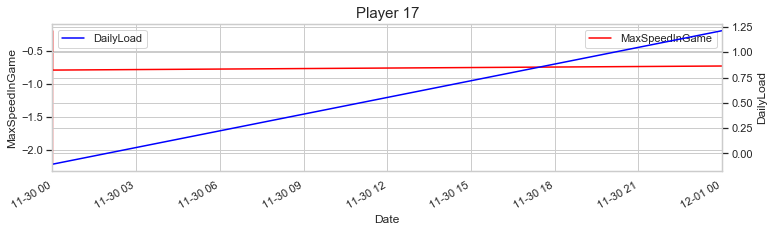

In [347]:
grouped = processed_speed.groupby(['PlayerID'])

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(111)
#     group[]
    group.plot.line(ax=ax1, color='red',x="Date",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.line(ax=ax3, color='blue',x="Date",y="DailyLoad")
    ax3.set_ylabel('DailyLoad')
    ax1.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

                               GEE Regression Results                              
Dep. Variable:              MaxSpeedInGame   No. Observations:                  311
Model:                                 GEE   No. clusters:                       17
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                  38
Family:                           Gaussian   Mean cluster size:                18.3
Dependence structure:         Exchangeable   Num. iterations:                     5
Date:                     Mon, 09 Dec 2019   Scale:                           1.007
Covariance type:                    robust   Time:                         18:53:51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0324      0.160     -0.202      0.840      -0.347       0.282
DailyLo

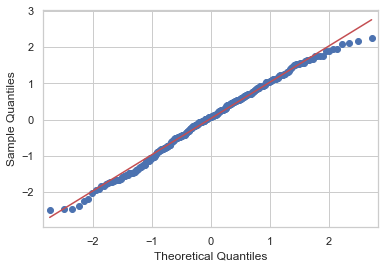

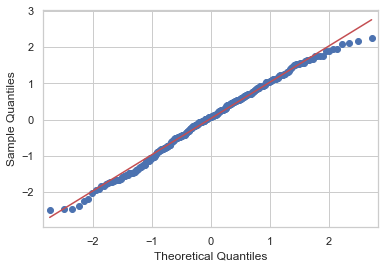

In [348]:
mod = smf.gee("MaxSpeedInGame ~ DailyLoad", "PlayerID", processed_speed, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())
qqplot(res.resid, line='s')

443 311
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MaxSpeedInGame
No. Observations: 311     Method:             REML          
No. Groups:       17      Scale:              0.6858        
Min. group size:  4       Likelihood:         -404.0981     
Max. group size:  38      Converged:          Yes           
Mean group size:  18.3                                      
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     -0.043     0.168  -0.253  0.800  -0.372   0.287
DailyLoad      0.009     0.053   0.171  0.864  -0.095   0.113
Group Var      0.419     0.214                               



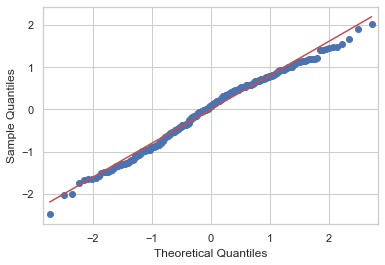

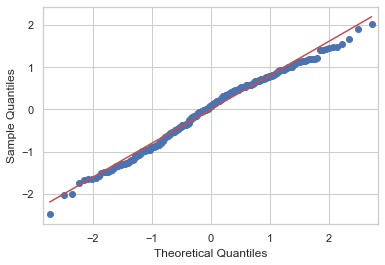

In [349]:
print(len(gps_df),len(processed_speed))
mixed = smf.mixedlm("MaxSpeedInGame ~ DailyLoad", processed_speed, groups = processed_speed["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())
qqplot(mixed_fit.resid, line='s')

Previous day's daily load negativel affects today's performance as well as wellness.

In [350]:
print(processed_speed['MaxSpeedInGame'].std())
print(processed_speed['DailyLoad'].std())
print(processed_speed['MaxSpeedInGame'].median())
print(processed_speed['DailyLoad'].median())
print(processed_speed['MaxSpeedInGame'].quantile(0.75))
print(processed_speed['DailyLoad'].quantile(0.75))

1.0016116045911267
1.0016116045911272
0.05367714841573852
-0.16181075467338885
0.6842073603198825
0.37567395522922015
